<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color: red;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Rainfall Tommorow?
</p>
</div> 

###  BDA - 1903 
#### Team members: Azhar Serikova, Yenglik Kadyr, Aman Nuftolla

### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">Info about our dataset from Kaggle:
* <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">Predicting Weather:
Meteorologists develop local or regional weather forecasts including predictions for several days into the future. The best forecasts take into account the weather events that are happening over a broad region. Knowing where storms are now can help forecasters predict where storms will be tomorrow and the next day. Technology, such as weather satellites and Doppler radar, helps the process of looking over a large area, as does the network of weather observations.

<span style="font-family: Arial;font-size:1.2em;color:#0e92ea">Source from: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">About data set:
* <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">This data set all about the daily weather observations from many locations across Australia and we need to predict whether it will rain tomorrow or not 

 ### Definition for our Columns:

##### - Date - The date of observation

##### - Location - The common name of the location of the weather station

##### - MinTemp - The minimum temperature in degrees celsius

##### - MaxTemp- The maximum temperature in degrees celsius

##### - Rainfall - The amount of rainfall recorded for the day in mm

##### - Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

##### - Sunshine - The number of hours of bright sunshine in the day.

##### - WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight

##### - WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

##### - WindDir9am - Direction of the wind at 9am


### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">Objective:
* <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">Predict next-day rain by training classification models on the target variable RainTomorrow

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 20px;
          color:white;
          text-align:center;">Index
</p>
</div>

### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">Agenda
* <a href="#Packages">Packages</a> 
* <a href="#Missing-values">Missing values</a>
* <a href="#EDA">EDA</a>
* <a href="#Data-cleaning">Data cleaning</a>
* <a href="#Null-values-imputation">Null values imputation</a>
* <a href="#Outliers">Outliers</a>
* <a href="#Normalize-data">Normalize data</a>
* <a href="#Models">Models</a>
* <a href="#Decision-Tree-based-models">Decision Tree based models</a>
* <a href="#models-comparison">models comparison</a>

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 20px;
          color:white;
          text-align:center;">Packages
</p>
</div>

# Packages

In [1]:
# packages

import numpy as np 
import pandas as pd 

# visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# missing data
import missingno as msno

# data imputation
from sklearn.impute import KNNImputer

# to split dataset to train and test
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Data imputation
from imblearn.over_sampling import SMOTE 

# ML
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier, Pool, cv

# ML classifier model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score ,roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix


In [2]:
# read data using pandas
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head(5) #first 5 output

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  

[4 rows x 23 columns]

In [4]:
df.info() #data info to check categorical and numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

As you can see there are  7 categorical data and 16 numerical datatypes.


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Missing values in data set
</p>
</div>

# Missing values

#### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">

In [5]:
#finding missing values and converting it to percentage
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value = missing_value.sort_values('missing values in percentage',ascending=False)

# plotting barplot to check percentage for each column
fig = px.bar(missing_value, y='missing values in percentage',x='variables',title='Missing values % in each column',
             template='none',text='missing values in percentage');
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')



fig.show()

### <span style="font-family: Arial;font-size:1.2em;color:#333333"> Inference

* <span style="font-family: Arial;font-size:1.2em;color:#333333">Most of the columns have missing values or NaNs which has more than 40% of most column values are empty or missing
* <span style="font-family: Arial;font-size:1.2em;color:#333333"> Sunshine variable has 48% of missing values in the data set	
* <span style="font-family: Arial;font-size:1.2em;color:#333333">Either we can use simple imputer to impute the columns with mean and median or we can use KNN 
* <span style="font-family: Arial;font-size:1.2em;color:#333333">The k-nearest neighbors (KNN) uses the distance metrics to predict the missing value and impute the values


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">EDA
</p>
</div>

# EDA


In [6]:
# stats
round(df.describe(),2)

MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.00  144199.00  142199.00     82670.00  75625.00      135197.00   
mean       12.19      23.22       2.36         5.47      7.61          40.04   
std         6.40       7.12       8.48         4.19      3.79          13.61   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.80          31.00   
50%        12.00      22.60       0.00         4.80      8.40          39.00   
75%        16.90      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     143693.00     142398.00    142806.00    140953.00    130395.00   
mean          14.04         18.66        68.88        51.54      1017.65   
std            8.92          8.81        19.03        20.80         7.11   
min            0.00          0.00         0.00         0.00       980.50   
25%            7.00         13.00        57.00        37.00      1012.90   
50%           13.00         19.00        70.00        52.00      1017.60   
75%           19.00         24.00        83.00        66.00      1022.40   
max          130.00         87.00       100.00       100.00      1041.00   

       Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
count    130432.00  89572.00  86102.00  143693.00  141851.00  
mean       1015.26      4.45      4.51      16.99      21.68  
std           7.04      2.89      2.72       6.49       6.94  
min         977.10      0.00      0.00      -7.20      -5.40  
25%        1010.40      1.00      2.00      12.30      16.60  
50%        1015.20      5.00      5.00      16.70      21.10  
75%        1020.00      7.00      7.00      21.60      26.40  
max        1039.60      9.00      9.00      40.20      46.70

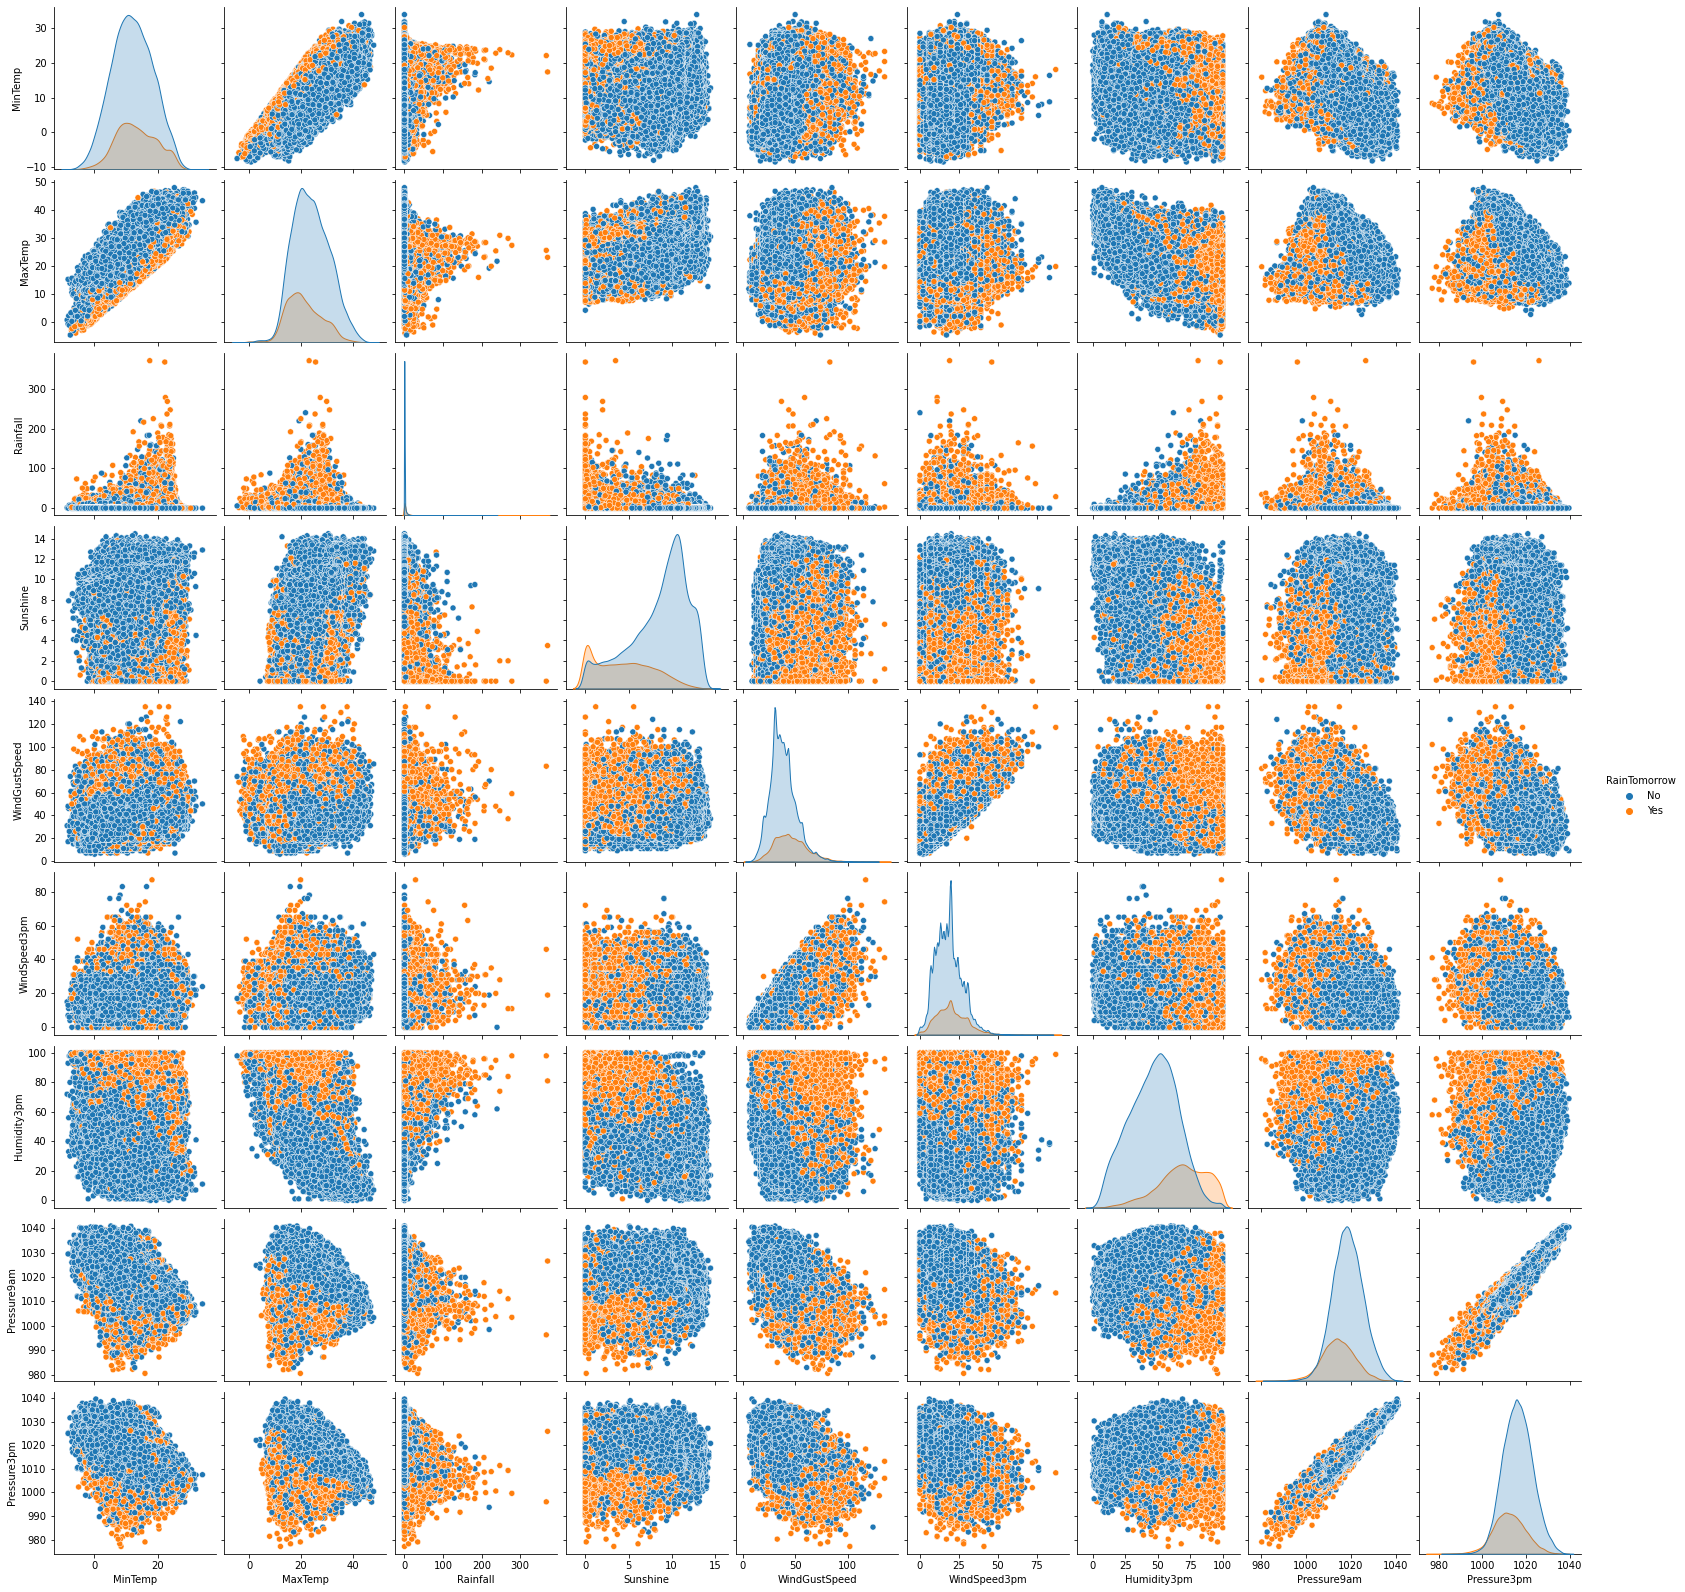

In [7]:
#we plotted columns to see their relation with other columns 
# plotted several variants of plotting were we can see and do some inference
plot_rain = df[['MinTemp', 'MaxTemp','Rainfall', 
       'Sunshine','WindGustSpeed', 'WindSpeed3pm','Humidity3pm',
       'Pressure9am', 'Pressure3pm','RainTomorrow']]

sns.pairplot(plot_rain, hue='RainTomorrow' , diag_kind = 'kde');

## <span style="font-family: Arial;font-size:1.2em;color:#333333"> Inference

* <span style="font-family: Arial;font-size:1.2em;color:#333333">Most of the variable is skewed and closely related to each other
* <span style="font-family: Arial;font-size:1.2em;color:#333333">some of the variabel are  exponential distribution in other words time related 

# Skewness

* <span style="font-family: Arial;font-size:1.2em;color:#333333"> Skewness refers to a distortion of data, that deviates from the normal distribution or a bell curve
    
* More informtion about skewness: https://www.spss-tutorials.com/skewness/

In [8]:
# skewness of data
# we just checked skewness to observe our data and to check how it skewed.
features =['MinTemp', 'MaxTemp','Rainfall', 'Evaporation',
       'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm']

for i in features:
    print(i,'skewness is',df[i].skew())

MinTemp skewness is 0.021188284011150468
MaxTemp skewness is 0.22083934813407782
Rainfall skewness is 9.83622525039533
Evaporation skewness is 3.7612860111420643
Sunshine skewness is -0.4964800381328167
WindGustSpeed skewness is 0.8748788780303394
WindSpeed9am skewness is 0.7776295122810298
WindSpeed3pm skewness is 0.6282154194116664
Humidity9am skewness is -0.48396899459793047
Humidity3pm skewness is 0.03361436764166918
Pressure9am skewness is -0.09552363669451734
Pressure3pm skewness is -0.04562140480119886


C:\anakonda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\anakonda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecate

C:\anakonda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\anakonda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecate

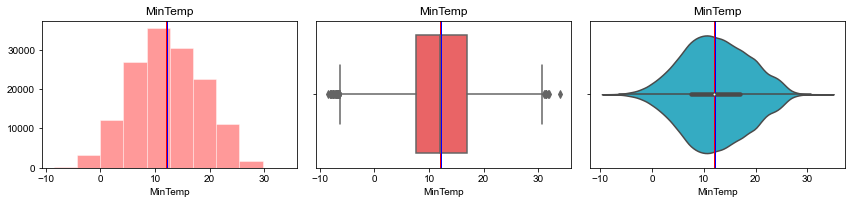

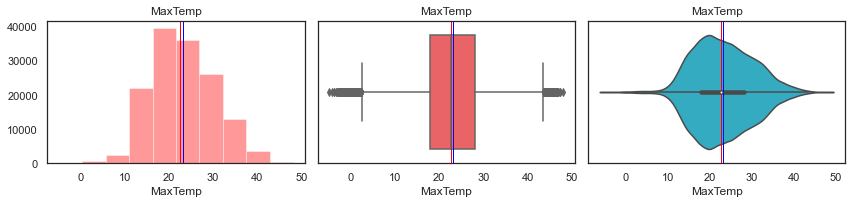

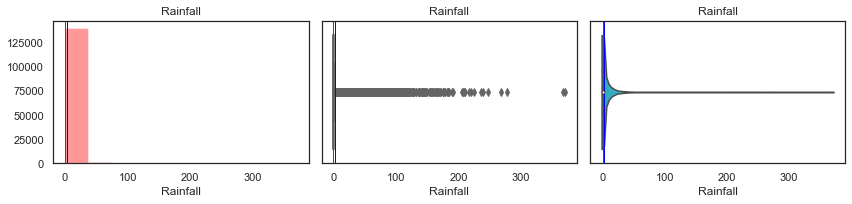

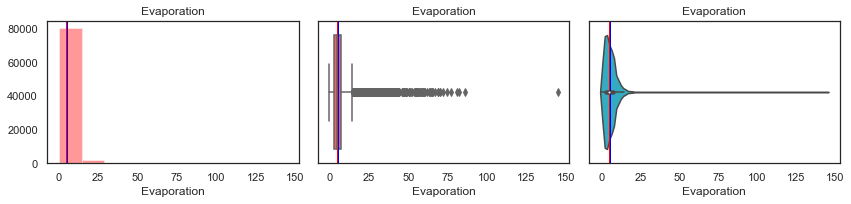

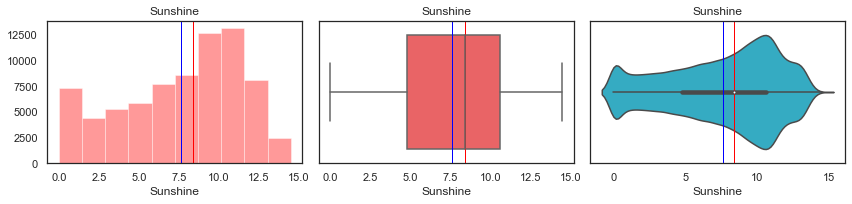

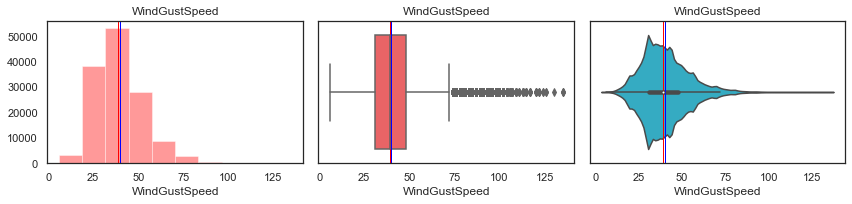

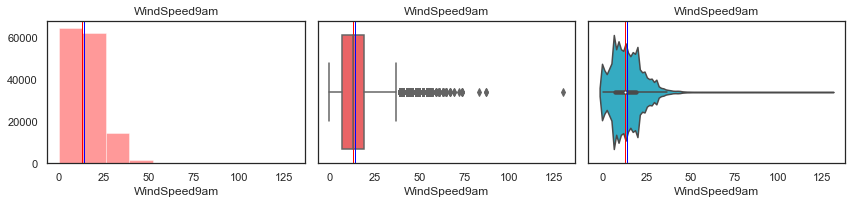

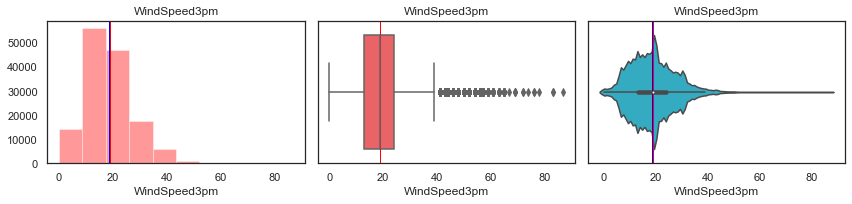

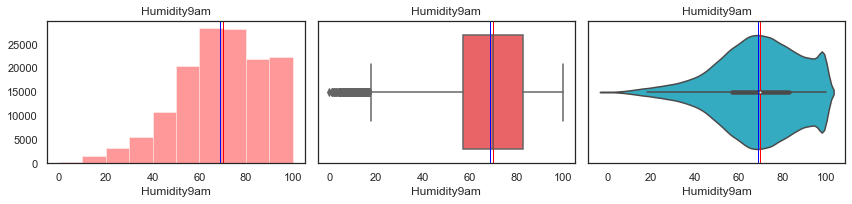

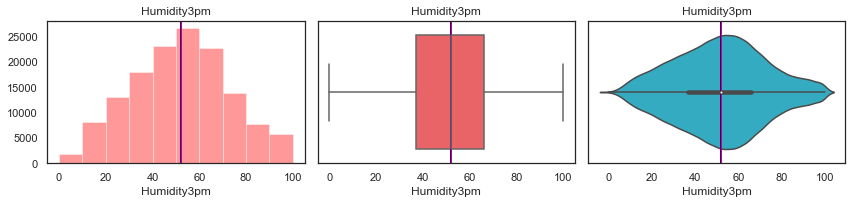

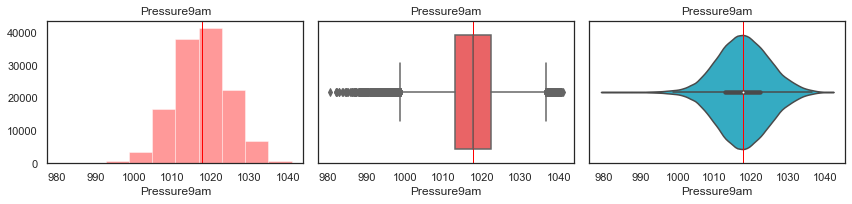

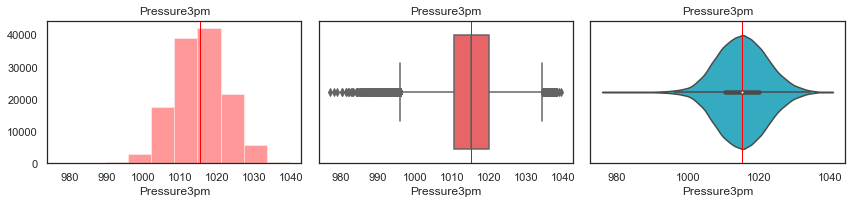

In [9]:
#building several plots observe our dataset. 
#several plots('displot','boxplot','voilinplot')
#more info in our inference for this code
#you can add additional package which called warning to avoid warning output
features =['MinTemp', 'MaxTemp','Rainfall', 'Evaporation',
       'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm']

for i in features:
   
    fig, ax = plt.subplots(1,3,figsize=(12, 3))

    sns.set_style('white') 
    sns.set_context(context = 'notebook',font_scale=1)

    sns.distplot(df[i],bins=10,color='red',kde=False,ax=ax[0]);
    sns.boxplot(df[i], ax = ax[1],color='#ff4e50');
    sns.violinplot(df[i],bins=10,color='#1ebbd9',ax=ax[2]);  
    
    ax[0].title.set_text(i);
    ax[1].title.set_text(i);
    ax[2].title.set_text(i);     
        
    ax[0].axvline(df[i].mean(), color='b', linewidth=1)
    ax[1].axvline(df[i].mean(), color='b', linewidth=1)
    ax[2].axvline(df[i].mean(), color='b', linewidth=1)
        
    ax[0].axvline(df[i].median(), color='r', linewidth=1)
    ax[1].axvline(df[i].median(), color='r', linewidth=1)
    ax[2].axvline(df[i].median(), color='r', linewidth=1)
    
    plt.tight_layout()    

## <span style="font-family: Arial;font-size:1.2em;color:#333333">Inference

* <span style="font-family: Arial;font-size:1.2em;color:#333333">we can observe that in the above box plot outlier are present in the dataset
* <span style="font-family: Arial;font-size:1.2em;color:#333333">most of the variable is skewed positively
* <span style="font-family: Arial;font-size:1.2em;color:#333333">scaling is required for the dataset 
* <span style="font-family: Arial;font-size:1.2em;color:#333333">The blue line indicates the mean of data and the red line indicate the median of the data and we can observe that few variables normally distributed and rest are skewed

## Correlation

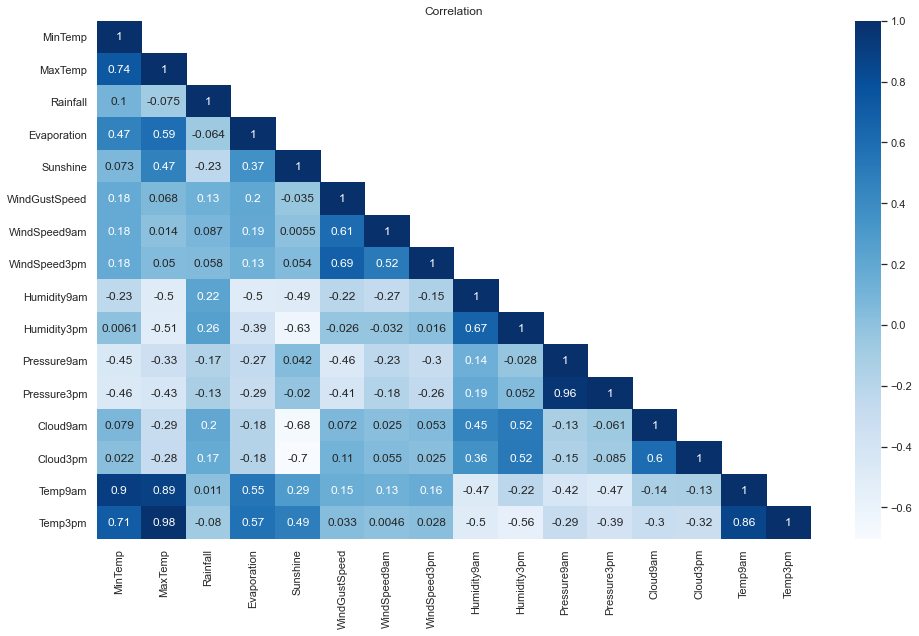

In [10]:
#ploting correlation heatmap kust to check relationships for each column
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=True,cmap='Blues',mask=np.triu(df.corr(),+1));
plt.title('Correlation');
plt.tight_layout()

*  <span style="font-family: Arial;font-size:1.2em;color:#333333">MaxTemp variable is highly correlated with Temp9am and with Temp3pm

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Data cleaning
</p>
</div>

In [11]:
# visual check to ensure null vales are not represented with other values like -999, -1, ?,-111


for feature in df.columns:
    print('*******','Column name:',feature,'*******')
    print(df[feature].unique())
    print('***********-end-***********')
    print(' ')

******* Column name: Date *******
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
***********-end-***********
 
******* Column name: Location *******
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
***********-end-***********
 
******* Column name: MinTemp *******
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16

[ 20.   4.  19.  11.   7.   6.  15.  17.  28.  24.  nan   9.   0.  13.
   2.  26.  30.  22.  35.  37.  31.  33.  48.  39.  44.  43.  41.  46.
  56.  83.  74.  52.  65.  50. 130.  54.  61.  57.  59.  87.  67.  63.
  69.  72.]
***********-end-***********
 
******* Column name: WindSpeed3pm *******
[24. 22. 26.  9. 20. 17. 28. 11.  6. 13. 30. 19. 31.  7. 15. 48.  4. 33.
  0.  2. nan 37. 46. 39. 50. 35. 44. 41. 43. 56. 61. 54. 52. 83. 65. 78.
 57. 63. 59. 74. 72. 69. 76. 87. 67.]
***********-end-***********
 
******* Column name: Humidity9am *******
[ 71.  44.  38.  45.  82.  55.  49.  48.  42.  58.  89.  76.  65.  57.
  50.  69.  80.  47.  56.  54.  41.  78.  46.  43.  33.  34.  36.  52.
  51.  40.  35.  39.  60.  37.  27.  32.  53.  20.  66.  63.  62.  87.
  61.  59.  92.  72.  67.  75.  88.  68.  73.  74.  83.  77.  70.  81.
  86.  97.  99.  91.  85.  93.  84.  94.  79.  98.  96.  95.  90.  64.
  29.  21. 100.  nan  24.  25.  31.  18.  23.  26.  28.  30.  19.  22.
  17.  15.   9.  12.  

In [12]:
# to date_time
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# checking for duplicated

sim = df.duplicated() 
sim.sum()

0

In [14]:
# dropping null values of target variable which is just 2.2%
df = df[df['RainTomorrow'].notnull()]

In [15]:
# drop null values of Rain Today variable which is just 2.2%
df = df[df['RainToday'].notnull()]

In [16]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Null values imputation
</p>
</div>

  
#### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea"> Null values imputation based on the percentage of missing values we can impute or drop some null values in variables
* <span style="font-family: Arial;font-size:1.2em;color:#333333"> For 'RainToday', 'RainTomorrow' we can drop the null values and it just around 4.4% of the data set


Info about KNN imputer if you fill like that: https://datascienceplus.com/knnimputer-for-missing-value-imputation-in-python-using-scikit-learn/

In [17]:
# knn imputer
knn_imputer = KNNImputer(n_neighbors=3)

In [18]:
# impute missing values using KNNImputer
# we just decided to fill missing values by using knn imputer
list_impute = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm','Cloud9am', 'Cloud3pm','Evaporation']

for i in list_impute:
    
    df[i] = knn_imputer.fit_transform(df[[i]])

In [19]:
# impute missing values for categorical variables

cat_impute =['WindGustDir', 'WindDir9am', 'WindDir3pm','Location']

for i in cat_impute:
    df[i] = df[i].fillna(df[i].mode()[0])

In [20]:
# null values check
# since we decided to drop the Sunshine we are not treating it
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine         66805
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [21]:
# converting object into the Categorical data type

for feature in df.columns:
    if df[feature].dtype =='object':
        df[feature] = pd.Categorical(df[feature]).codes

In [22]:
df.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01         2     13.4     22.9       0.6     5.472516       NaN   
1 2008-12-02         2      7.4     25.1       0.0     5.472516       NaN   
2 2008-12-03         2     12.9     25.7       0.0     5.472516       NaN   
3 2008-12-04         2      9.2     28.0       0.0     5.472516       NaN   
4 2008-12-05         2     17.5     32.3       1.0     5.472516       NaN   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13           44.0          13  ...         71.0         22.0   
1           14           44.0           6  ...         44.0         25.0   
2           15           46.0          13  ...         38.0         30.0   
3            4           24.0           9  ...         45.0         16.0   
4           13           41.0           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000   4.49925     16.9     21.8          0   
1       1010.6       1007.8  4.431161   4.49925     17.2     24.3          0   
2       1007.6       1008.7  4.431161   2.00000     21.0     23.2          0   
3       1017.6       1012.8  4.431161   4.49925     18.1     26.5          0   
4       1010.8       1006.0  7.000000   8.00000     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Outliers
</p>
</div>

# Outliers
#### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">Outliers in data set are extrem values in the variables 


Read more about here:  https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

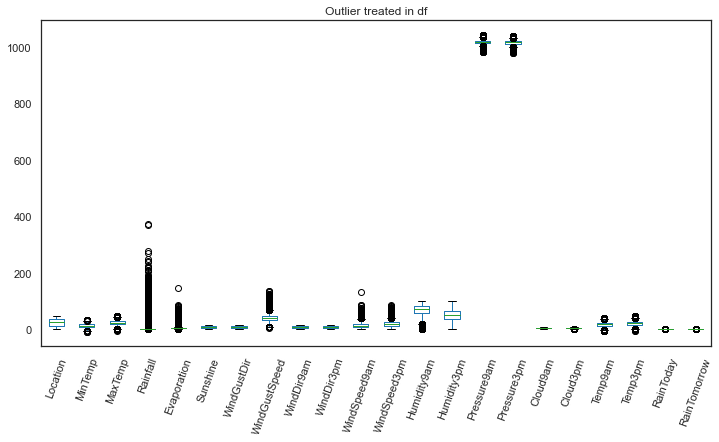

In [23]:
# outliers
df.plot(kind='box',figsize=(12,6))
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

In [24]:
#creating dunction which used to remove outliers in columns by using IQR
# here you can read really helpfull information about that: https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
# removing outliers

for column in df[list_impute].columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column]>ur, ur,df[column])
    df[column] = np.where(df[column]<lr,lr,df[column])

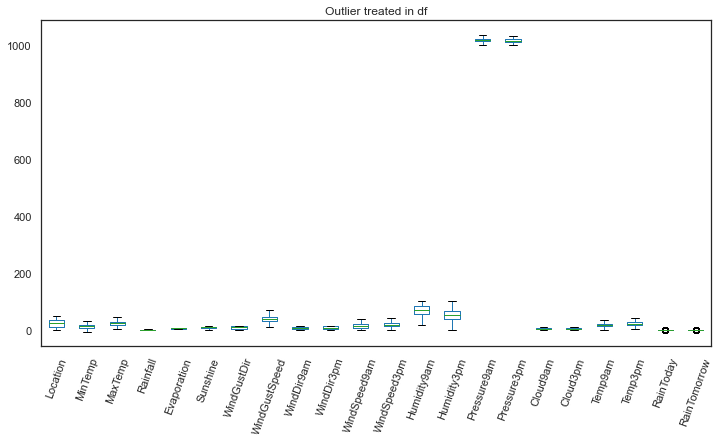

In [26]:
#again plotting to be shure that we gavent got outliers
df.plot(kind='box',figsize=(12,6))
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Split on Train and Test 
</p>
</div>

In [27]:
# dropped 'MaxTemp' because it highly correlated and 'Sunshine' because it has more than 48% values are missing
#splitting on Train and test 
X = df[['MinTemp', 'Rainfall', 'Evaporation',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm','WindGustDir', 'WindDir9am', 'WindDir3pm','Location','RainToday']]
#our target
y = df.pop('RainTomorrow')

In [28]:
# Data split
# to split dataset to train and test with test size = 0.30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [29]:
#checking info(how many row,column) in our traing and test
X_train.shape, X_test.shape

((98550, 19), (42237, 19))

In [30]:
y_train.value_counts(1) #checking value_counts where we have info about  

0    0.779219
1    0.220781
Name: RainTomorrow, dtype: float64

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Scaling
</p>
</div>

# Normalize data
#### <span style="font-family: Arial;font-size:1.2em;color:#0e92ea"> Scaling is process of standardize the independent features present in the data

In [31]:
# Scaling data
sc = MinMaxScaler()
#we used MinMaxScaller to normolize our data. 
#if you neeed more info about that check this link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#it will be helpfull for you 
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:250%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 15px;
          color:white;
          text-align:center;">Models
</p>
</div>

In [ ]:
#now here we started build models using several methids

In [ ]:
#don't be too lazy to check these links, because you need them to understand our models

## <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">i. Naive Bayes 

Additional information about this model :www.analyticsvidhya.com

In [32]:
NaiveBayse_model = GaussianNB()
# Fit the model using train sets
NaiveBayse_model.fit(x_train, y_train)
#prdicted values
y_predict_NaiveBayse = NaiveBayse_model.predict(x_test)

#checking accurasy of predicted values
NaiveBayse_model_score = NaiveBayse_model.score(x_test, y_test)
NaiveBayse_model_score_train = NaiveBayse_model.score(x_train, y_train)

print('Accuracy on Test set',NaiveBayse_model_score)
print('Accuracy on Train set',NaiveBayse_model_score_train)

print(confusion_matrix(y_test, y_predict_NaiveBayse))



Accuracy on Test set 0.787106091815233
Accuracy on Train set 0.7899543378995434
[[27299  5495]
 [ 3497  5946]]


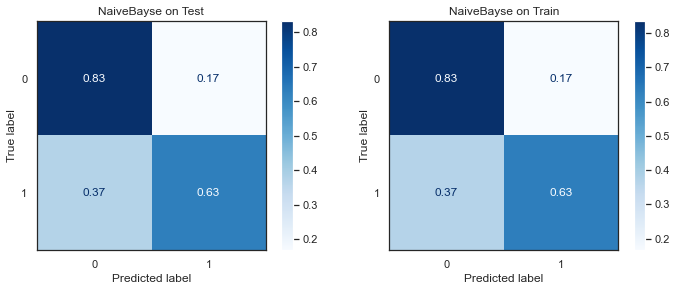

In [33]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))

sns.set_style('dark')
sns.set_context(context = 'notebook',font_scale=1)
plot_confusion_matrix(NaiveBayse_model,x_test,y_test,cmap='Blues',normalize='true',ax = ax[0]);
plot_confusion_matrix(NaiveBayse_model,x_train,y_train,cmap='Blues',normalize='true',ax = ax[1]);

ax[0].title.set_text('NaiveBayse on Test');
ax[1].title.set_text('NaiveBayse on Train');
plt.grid(False)
plt.tight_layout();

Additional information about this model :   www.analyticsvidhya.com

Additional information about treshhold : https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

Additional information about ROC curve: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

AUC on test set 0.8271781144427802


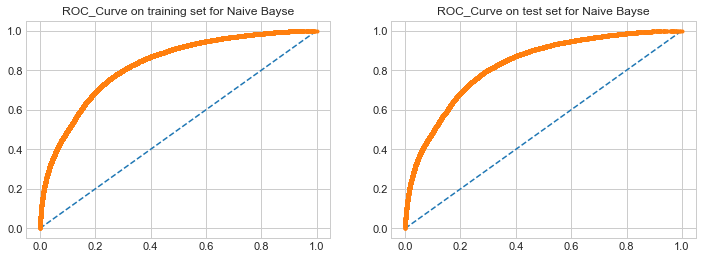

In [34]:
# probability
NB_probs_train = NaiveBayse_model.predict_proba(x_train)
NB_probs_train = NB_probs_train[:, 1]

NB_probs_test = NaiveBayse_model.predict_proba(x_test)
NB_probs_test = NB_probs_test[:, 1]

# plot
plt.style.use('seaborn-whitegrid')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, NB_probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, NB_probs_test)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.plot([0, 1], [0, 1], linestyle='--');
ax1.plot(fpr_train, tpr_train, marker='.');
ax1.set_title('ROC_Curve on training set for Naive Bayse');

ax2.plot([0, 1], [0, 1], linestyle='--');
ax2.plot(fpr_test, tpr_test, marker='.');
ax2.set_title('ROC_Curve on test set for Naive Bayse');

auc_NaiveBayse_test = auc(fpr_test, tpr_test)
print('AUC on test set',auc_NaiveBayse_test)

## <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">ii. LogisticRegression

In [35]:
LR_model = LogisticRegression(max_iter=1000)
# Fit the model using train sets
LR_model.fit(x_train, y_train)
#prdicted values
y_predict_LR = LR_model.predict(x_test)
#checking accurasy of predicted values
LR_model_score = LR_model.score(x_test, y_test)
LR_model_score_train = LR_model.score(x_train, y_train)

print('Accuracy on Test set',LR_model_score)
print('Accuracy on Train set',LR_model_score_train)
print(confusion_matrix(y_test, y_predict_LR))

Accuracy on Test set 0.8418448279944125
Accuracy on Train set 0.8451648909183156
[[30992  1802]
 [ 4878  4565]]


AUC on test set 0.8635256585622942


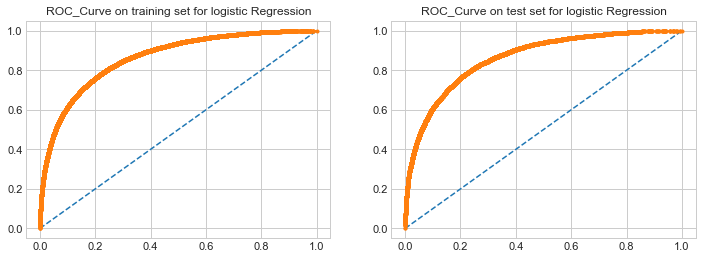

In [36]:
# probability
probs_train = LR_model.predict_proba(x_train)
probs_train = probs_train[:, 1]

probs_test = LR_model.predict_proba(x_test)
probs_test = probs_test[:, 1]

# plot
plt.style.use('seaborn-whitegrid')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.plot([0, 1], [0, 1], linestyle='--');
ax1.plot(fpr_train, tpr_train, marker='.');
ax1.set_title('ROC_Curve on training set for logistic Regression');

ax2.plot([0, 1], [0, 1], linestyle='--');
ax2.plot(fpr_test, tpr_test, marker='.');
ax2.set_title('ROC_Curve on test set for logistic Regression');

auc_NaiveBayse_test = auc(fpr_test, tpr_test)
print('AUC on test set',auc_NaiveBayse_test)

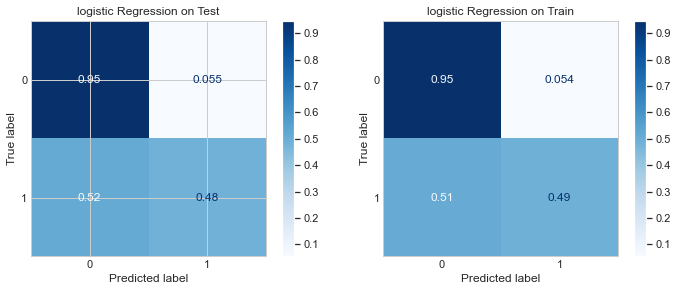

In [37]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))

sns.set_style('dark')
sns.set_context(context = 'notebook',font_scale=1)
plot_confusion_matrix(LR_model,x_test,y_test,cmap='Blues',normalize='true',ax = ax[0]);
plot_confusion_matrix(LR_model,x_train,y_train,cmap='Blues',normalize='true',ax = ax[1]);

ax[0].title.set_text('logistic Regression on Test');
ax[1].title.set_text('logistic Regression on Train');
plt.grid(False)
plt.tight_layout();

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:          color:white;
;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 20px;
          text-align:center;">Decision Tree based model
    
</p>
</div>

## <span style="font-family: Arial;font-size:1.2em;color:#0e92ea">iii. Random Forest

Additional information about this model : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [38]:
RF_model = RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 500)

RF_model.fit(x_train,y_train)

y_pred_RF =RF_model.predict(x_test)

model_score_RF = RF_model.score(x_test, y_test)
model_score_RF_train = RF_model.score(x_train, y_train)

print('Accuracy on Test set',model_score_RF)
print('Accuracy on Train set',model_score_RF_train)
print(confusion_matrix(y_test,y_pred_RF))

Accuracy on Test set 0.8467930961005753
Accuracy on Train set 0.857767630644343
[[31489  1305]
 [ 5166  4277]]


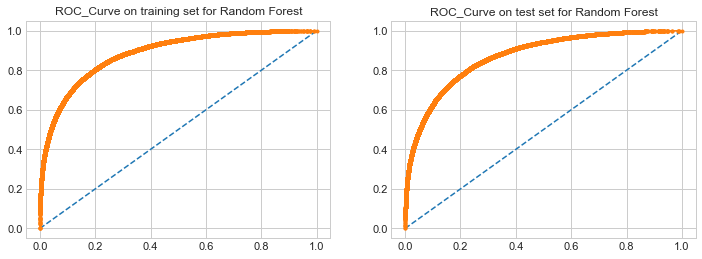

In [39]:
# probability
probs_train = RF_model.predict_proba(x_train)
probs_train = probs_train[:, 1]

probs_test = RF_model.predict_proba(x_test)
probs_test = probs_test[:, 1]

# plot
plt.style.use('seaborn-whitegrid')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.plot([0, 1], [0, 1], linestyle='--');
ax1.plot(fpr_train, tpr_train, marker='.');
ax1.set_title('ROC_Curve on training set for Random Forest');

ax2.plot([0, 1], [0, 1], linestyle='--');
ax2.plot(fpr_test, tpr_test, marker='.');
ax2.set_title('ROC_Curve on test set for Random Forest');

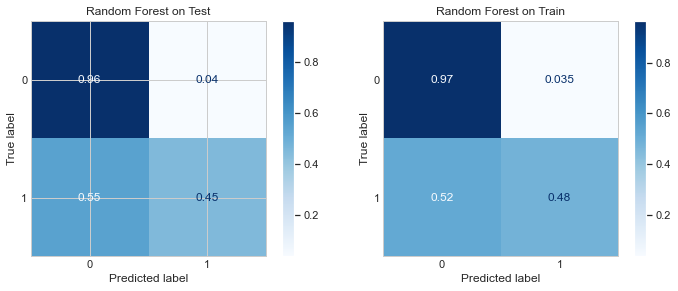

In [40]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))


sns.set_style('dark')
sns.set_context(context = 'notebook',font_scale=1)
plot_confusion_matrix(RF_model,x_test,y_test,cmap='Blues',normalize='true',ax = ax[0]);
plot_confusion_matrix(RF_model,x_train,y_train,cmap='Blues',normalize='true',ax = ax[1]);
plt.grid(False)
ax[0].title.set_text('Random Forest on Test');
ax[1].title.set_text('Random Forest on Train');

plt.tight_layout();

# models comparison

In [41]:
#In the end we just created Dataframe to watch on our observed models and make conclusion
Accuracy_score = pd.DataFrame({'Models':['Random Forest','Logistic Regression','Naive Bayse'],'Accuracy on Test set':[model_score_RF,LR_model_score,NaiveBayse_model_score],'Accuracy on Training set':[  model_score_RF_train,LR_model_score_train,NaiveBayse_model_score_train]})
#converirng it to df and finding accuracy of each model
Accuracy_score = Accuracy_score.sort_values('Accuracy on Test set',ascending=False)

In [42]:
Accuracy_score

Models  Accuracy on Test set  Accuracy on Training set
0        Random Forest              0.846793                  0.857768
1  Logistic Regression              0.841845                  0.845165
2          Naive Bayse              0.787106                  0.789954

# Conclusion

From the information above , we can see that the models represent ~80% accuracy of predicting the weather tomorrow .